### Chapter 6: Applying RESNET Model for Semantic Segmentation

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as tt
from PIL import Image
from torchvision import models

In [2]:
# view models available from torchvision
torch.hub.list('pytorch/vision')

Using cache found in C:\Users\dlpar/.cache\torch\hub\pytorch_vision_master


['alexnet',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'fcn_resnet101',
 'fcn_resnet50',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'wide_resnet101_2',
 'wide_resnet50_2']

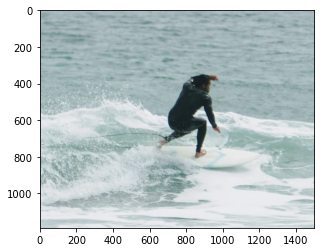

In [3]:
# load the image to analyze
img = Image.open('./media/surfer.jpg')
plt.imshow(img);

In [4]:
# instantiate a pretrained FCN ResNet model
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [5]:
# create a transformation function that normalizes the input image
def normalize(img):
    normalize_t = tt.Compose([tt.Resize(256),
                              tt.CenterCrop(224),
                              tt.ToTensor(),
                              tt.Normalize(mean=[0.485, 0.456, 0.406],
                                           std=[0.229, 0.224, 0.225])])
    return normalize_t(img).unsqueeze(0)

In [6]:
# apply the transformation function to the image
img_tensor = normalize(img)

In [7]:
# apply the model
out = fcn(img_tensor)['out']
out_model = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()

In [8]:
# create a helper function to convert to rgb
def show_segment(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
        # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
        (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
        # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
        (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
        # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
        (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
        # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
        (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

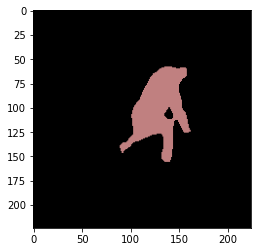

In [9]:
# show the segmented image
rgb = show_segment(out_model)
plt.imshow(rgb);